# Credit Card Fraud Detection
by **Sai Vamsy Dhulipala**

## Part III - Model Building using Logistic Regression

## Importing necessary packages

In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 400)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
%matplotlib inline

In [3]:
from os import chdir, getcwd
import pickle

In [4]:
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.feature_selection import RFECV

## Importing the data

### Defining a function to read the data

In [5]:
def read_resampled_data(name):
    file = pickle.load(open(getcwd() + "/data/resampled_data/" + name + "_resampled.pkl","rb"))
    return file

### Reading the data

In [6]:
folder_path = input("Please provide the path of the folder, by replacing \\ as /:")
chdir(folder_path)

In [7]:
X_resampled = read_resampled_data("X")
y_resampled = read_resampled_data("y")

## Model building

### Defining a function to print the grid scores from RFECV

In [8]:
def plot_rfe_result(grid_scores):
    
    fig, ax = plt.subplots(figsize=(15,5))

    plt.plot(grid_scores)

    ax.set_xlabel("Features")
    ax.set_ylabel("Recall")

    fig.show()

### Logistic Regression

 SGD Classifier has been used in this case since the size of the data is quite huge and SGD Classifier would be appropriate to model such data.

In [9]:
log_reg = SGDClassifier(
    loss="log",
    verbose=1,
    n_jobs=-1,
    random_state=42,
    early_stopping=True
)

#### Performing RFECV to select the optimal features for modeling

In [10]:
rfecv_log_reg = RFECV(
    estimator=log_reg,
    cv=StratifiedKFold(5, shuffle=True, random_state=42),
    scoring="recall",
    n_jobs=-1,
    verbose=1
)

In [11]:
rfecv_log_reg = rfecv_log_reg.fit(X_resampled, y_resampled)

Fitting estimator with 68 features.
-- Epoch 1
Norm: 5.92, NNZs: 68, Bias: -4.420757, T: 690705, Avg. loss: 1.760182
Total training time: 0.54 seconds.
-- Epoch 2
Norm: 4.58, NNZs: 68, Bias: -3.678735, T: 1381410, Avg. loss: 0.237738
Total training time: 1.65 seconds.
-- Epoch 3
Norm: 3.92, NNZs: 68, Bias: -3.323411, T: 2072115, Avg. loss: 0.211713
Total training time: 2.62 seconds.
-- Epoch 4
Norm: 3.95, NNZs: 68, Bias: -3.376587, T: 2762820, Avg. loss: 0.203159
Total training time: 3.63 seconds.
-- Epoch 5
Norm: 3.93, NNZs: 68, Bias: -3.306371, T: 3453525, Avg. loss: 0.198981
Total training time: 4.61 seconds.
-- Epoch 6
Norm: 3.68, NNZs: 68, Bias: -3.232528, T: 4144230, Avg. loss: 0.196619
Total training time: 5.60 seconds.
Convergence after 6 epochs took 6.00 seconds
Fitting estimator with 67 features.
-- Epoch 1
Norm: 5.19, NNZs: 67, Bias: -4.233834, T: 690705, Avg. loss: 1.585822
Total training time: 0.54 seconds.
-- Epoch 2
Norm: 4.65, NNZs: 67, Bias: -3.635486, T: 1381410, Avg.

<ipython-input-8-fa9cc244fc19>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


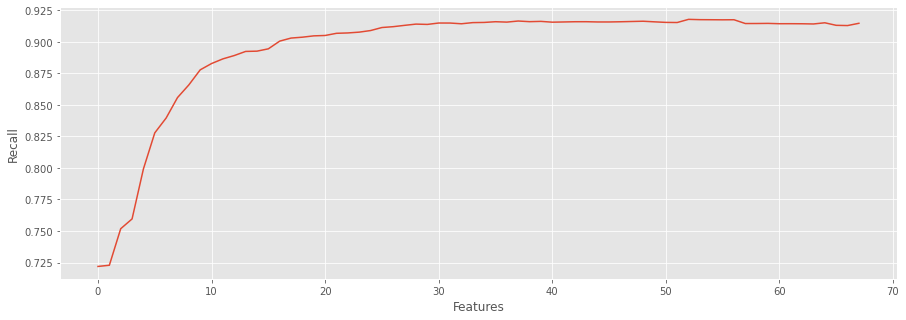

In [12]:
plot_rfe_result(rfecv_log_reg.grid_scores_)

In [13]:
cols_log_reg = rfecv_log_reg.support_
print(f"Optimal features: {cols_log_reg.sum()}")

Optimal features: 53


#### Model building using the selected columns with stratified k-fold CV

In [14]:
log_reg_cv = cross_validate(
    log_reg,
    X_resampled[:,cols_log_reg],
    y_resampled,
    verbose=1,
    return_train_score=True,
    n_jobs=-1,
    return_estimator=True,
    cv=StratifiedKFold(5, shuffle=True, random_state=42)
)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    6.1s remaining:    9.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.6s finished


In [15]:
print(log_reg_cv["test_score"])

[0.91923305 0.92001433 0.92232067 0.92084175 0.92149326]


#### Selecting the best model from the CV results

In [16]:
log_reg_best = log_reg_cv["estimator"][log_reg_cv["test_score"].argmax()]

## Saving the data into pickle files

In [17]:
for f, file_name in (log_reg_best, "log_reg"), (cols_log_reg, "cols_log_reg"):
    pickle.dump(f, open(getcwd() + "/data/models/" + file_name + ".pkl", "wb"))
    del f

### Deleting all the variables present in the memory

In [18]:
%reset -f